In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score

from collections import Counter



In [ ]:
df = pd.read_csv('Expri_Dataset (1).csv')

In [ ]:
df.keys()

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'Class'],
      dtype='object')

In [ ]:
df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,0.000286,1.519145,0.000887,1.795573,0.000060,1.035119,0.001943,2.353083,0.007488,2.506212,0.000891,1.878569,2.574750,1.922121,True
1,0.000201,1.396803,0.000802,1.506190,0.000048,0.865181,0.001421,2.245061,0.007157,2.171035,0.000734,1.679726,1.770226,2.034724,True
2,0.000245,1.505849,0.000824,1.721787,0.000055,1.001181,0.001641,2.276966,0.007108,2.400657,0.000836,1.834776,1.782286,1.746936,True
3,0.000213,1.510623,0.000759,2.028541,0.000049,0.984888,0.001457,2.341665,0.006437,2.989322,0.000662,1.861950,1.793722,2.117791,True
4,0.000251,1.542969,0.000923,2.005357,0.000068,1.021463,0.001600,2.333618,0.007113,2.846943,0.000853,1.882261,1.908964,2.109222,True
5,0.000209,1.524177,0.000541,1.802984,0.000051,1.023522,0.001271,2.301941,0.003957,2.555441,0.000604,1.895721,1.888885,2.275855,True
6,0.000298,1.089213,0.001045,1.896271,0.000043,0.756964,0.002153,1.842233,0.010523,2.979812,0.000736,1.455951,2.582874,1.982692,True
7,0.000295,1.211168,0.000701,1.592164,0.000035,0.724462,0.002136,2.066001,0.007316,2.409109,0.000484,1.401803,2.710268,2.016661,True
8,0.000248,1.505956,0.000673,1.706046,0.000051,1.006302,0.001589,2.288230,0.005503,2.362383,0.000757,1.857861,1.825361,2.008827,True
9,0.000247,1.525217,0.000751,2.070327,0.000052,1.051607,0.001614,2.278909,0.006329,3.010688,0.000746,1.901740,1.956299,2.281248,True


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [ ]:
scaled_data= scaler.transform(df)

In [ ]:
scaled_data

array([[ 0.41544532,  1.0693801 ,  0.06835764, ...,  0.49446675,
        -0.30783169,  1.70065151],
       [-0.90761641,  0.35180072, -0.20921452, ..., -0.97354798,
        -0.04645593,  1.70065151],
       [-0.22071323,  0.99139124, -0.13955214, ..., -0.95154215,
        -0.71447458,  1.70065151],
       ...,
       [-1.1715228 , -0.38863276, -0.7996348 , ..., -0.7563127 ,
         0.42977417, -0.58800994],
       [-1.31577559, -0.87231212, -0.9806733 , ..., -1.04664737,
        -0.13414208, -0.58800994],
       [ 0.93487094, -0.42405758,  0.20972179, ...,  1.08543549,
        -0.05610942, -0.58800994]])

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)

In [ ]:
pca.fit(scaled_data)

PCA(n_components=2)

In [ ]:
x_pca=pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(650, 15)

In [ ]:
x_pca.shape

(650, 2)

In [ ]:
scaled_data

array([[ 0.41544532,  1.0693801 ,  0.06835764, ...,  0.49446675,
        -0.30783169,  1.70065151],
       [-0.90761641,  0.35180072, -0.20921452, ..., -0.97354798,
        -0.04645593,  1.70065151],
       [-0.22071323,  0.99139124, -0.13955214, ..., -0.95154215,
        -0.71447458,  1.70065151],
       ...,
       [-1.1715228 , -0.38863276, -0.7996348 , ..., -0.7563127 ,
         0.42977417, -0.58800994],
       [-1.31577559, -0.87231212, -0.9806733 , ..., -1.04664737,
        -0.13414208, -0.58800994],
       [ 0.93487094, -0.42405758,  0.20972179, ...,  1.08543549,
        -0.05610942, -0.58800994]])

In [ ]:
x_pca

array([[-2.11763163, -1.40218801],
       [ 0.95024335, -0.86537704],
       [-0.85693035, -1.63654957],
       ...,
       [ 2.36462515, -0.86281123],
       [ 3.60497973,  0.28356954],
       [-0.24519666,  1.66382904]])

Text(0, 0.5, 'Second Principal Component')

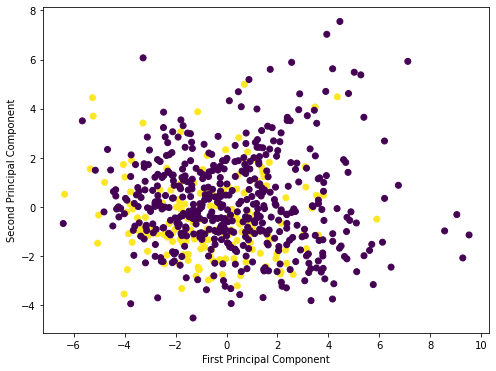

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Class'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [ ]:
X=x_pca
Y=df["Class"].values

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(X, Y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [ ]:
print(f'training set size: {x_train.shape[0]} samples \ntest set size: {x_test.shape[0]} samples')

training set size: 520 samples 
test set size: 130 samples


In [ ]:
scaler= Normalizer().fit(x_train) # the scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set

In [ ]:
print('x train before Normalization')
print(x_train[0:5])
print('\nx train after Normalization')
print(normalized_x_train[0:5])

x train before Normalization
[[-1.72384181 -1.45452451]
 [ 1.84631269  2.69301092]
 [ 3.36923227  0.05269931]
 [-1.41611283  2.98608534]
 [-2.11910522 -1.82231647]]

x train after Normalization
[[-0.76428428 -0.64487948]
 [ 0.56546099  0.82477504]
 [ 0.9998777   0.01563943]
 [-0.42849441  0.90354443]
 [-0.75820536 -0.65201582]]


In [ ]:
def distance_ecu(x_train, x_test_point):
  """
  Input:
    - x_train: corresponding to the training data
    - x_test_point: corresponding to the test point

  Output:
    -distances: The distances between the test point and each point in the training data.

  """
  distances= []  ## create empty list called distances
  for row in range(len(x_train)): ## Loop over the rows of x_train
      current_train_point= x_train[row] #Get them point by point
      current_distance= 0 ## initialize the distance by zero

      for col in range(len(current_train_point)): ## Loop over the columns of the row
          
          current_distance += (current_train_point[col] - x_test_point[col]) **2
          ## Or current_distance = current_distance + (x_train[i] - x_test_point[i])**2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance) ## Append the distances

  # Store distances in a dataframe
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances

In [ ]:
def voting(df_nearest, y_train):
    """
    Input:
        -df_nearest: dataframe contains the nearest K neighbors between the full training dataset and the test point.
        -y_train: the labels of the training dataset.

    Output:
        -y_pred: the prediction based on Majority Voting

    """

    ## Use the Counter Object to get the labels with K nearest neighbors.
    counter_vote= Counter(y_train[df_nearest.index])

    y_pred= counter_vote.most_common()[0][0]   # Majority Voting

    return y_pred

In [ ]:
def nearest_neighbors(distance_point, K):
    """
    Input:
        -distance_point: the distances between the test point and each point in the training data.
        -K             : the number of neighbors

    Output:
        -df_nearest: the nearest K neighbors between the test point and the training data.

    """

    # Sort values using the sort_values function
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    ## Take only the first K neighbors
    df_nearest= df_nearest[:K]
    return df_nearest

In [ ]:
def KNN_from_scratch(x_train, y_train, x_test, K):

    """
    Input:
    -x_train: the full training dataset
    -y_train: the labels of the training dataset
    -x_test: the full test dataset
    -K: the number of neighbors

    Output:
    -y_pred: the prediction for the whole test set based on Majority Voting.

    """

    y_pred=[]

    ## Loop over all the test set and perform the three steps
    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)  ## Step 1
      df_nearest_point= nearest_neighbors(distance_point, K)  ## Step 2
      y_pred_point    = voting(df_nearest_point, y_train) ## Step 3
      y_pred.append(y_pred_point)

    return y_pred  

In [ ]:
K=3
y_pred_scratch= KNN_from_scratch(normalized_x_train, y_train, normalized_x_test, K)
print(y_pred_scratch)

[False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, True, False, True, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, False, False, False, False, False, False, False, False, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, True, False, True, False, False, False, True, False, False, False, True, False, False, False, False, False, True, False, False, True, True, False, False, False, False, False, False, False, False, False, False, False, False, True, True, False, True, False, True, False, False, False, True, False, False, True]


In [ ]:
knn=KNeighborsClassifier(K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn= knn.predict(normalized_x_test)
print(y_pred_sklearn)

[False False False False False False False  True False False False False
 False False False False False  True False False False False False False
 False  True False  True False False  True False False  True  True False
 False False False False False False False False False False False  True
 False False False False False False False False False False  True False
 False False False False False False False False False  True  True False
 False False False False False False False False False False False False
  True False  True False False False  True False False False  True False
 False False False False  True False False  True  True False False False
 False False False False False False False False False  True  True False
  True False  True False False False  True False False  True]


In [ ]:
print(np.array_equal(y_pred_sklearn, y_pred_scratch))

True


In [ ]:
print(f'The accuracy of our implementation is {accuracy_score(y_test, y_pred_scratch)}')
print(f'The accuracy of sklearn implementation is {accuracy_score(y_test, y_pred_sklearn)}')

The accuracy of our implementation is 0.6692307692307692
The accuracy of sklearn implementation is 0.6692307692307692


In [ ]:
n_splits= 4 ## Choose the number of splits
kf= KFold(n_splits= n_splits) ## Call the K Fold function

accuracy_k= [] ## Keep track of the accuracy for each K
k_values= list(range(1,30,2)) ## Search for the best value of K

for k in k_values: ## Loop over the K values
  accuracy_fold= 0
  for normalized_x_train_fold_idx, normalized_x_valid_fold_idx in  kf.split(normalized_x_train): ## Loop over the splits
      normalized_x_train_fold= normalized_x_train[normalized_x_train_fold_idx] ## fetch the values
      y_train_fold= y_train[normalized_x_train_fold_idx]

      normalized_x_test_fold= normalized_x_train[normalized_x_valid_fold_idx]
      y_valid_fold= y_train[normalized_x_valid_fold_idx]
      y_pred_fold= KNN_from_scratch(normalized_x_train_fold, y_train_fold, normalized_x_test_fold, k)

      accuracy_fold+= accuracy_score (y_pred_fold, y_valid_fold) ## Accumulate the accuracy
  accuracy_fold= accuracy_fold/ n_splits ## Divide by the number of splits
  accuracy_k.append(accuracy_fold)

In [ ]:
print(f'The accuracy for each K value was {list ( zip (accuracy_k, k_values))}') ## creates a tuple with accuracy corresponding to k value

The accuracy for each K value was [(0.6326923076923078, 1), (0.6942307692307692, 3), (0.6865384615384615, 5), (0.7192307692307692, 7), (0.7288461538461538, 9), (0.7307692307692308, 11), (0.7403846153846154, 13), (0.7384615384615385, 15), (0.7442307692307693, 17), (0.7442307692307693, 19), (0.7346153846153847, 21), (0.7346153846153847, 23), (0.7384615384615385, 25), (0.7326923076923078, 27), (0.7384615384615385, 29)]


In [ ]:
print(f'Best accuracy was {np.max(accuracy_k)}, which corresponds to a value of K= {k_values[np.argmax(accuracy_k)]}')

Best accuracy was 0.7442307692307693, which corresponds to a value of K= 17


In [ ]:
auc_score = roc_auc_score(y_test, y_pred_scratch)
auc_score

0.5058651026392962

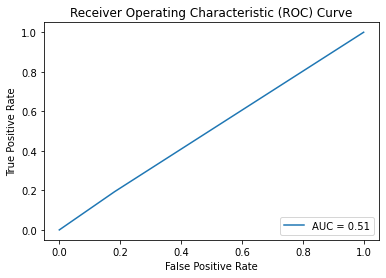

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_scratch)
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))
# Add labels and title to plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
# Show the plot
plt.show()